In [1]:
# import librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
data = pd.read_csv('data.csv', delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

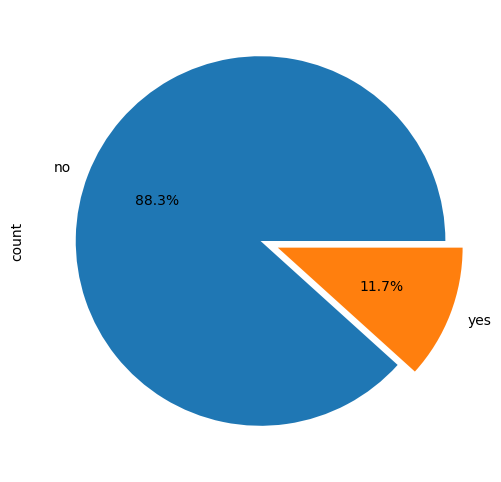

In [9]:
value_counts = data['y'].value_counts()
plt.figure(figsize=(6, 6))
value_counts.plot(kind='pie', explode=[0, 0.1], autopct='%1.1f%%')
plt.show()

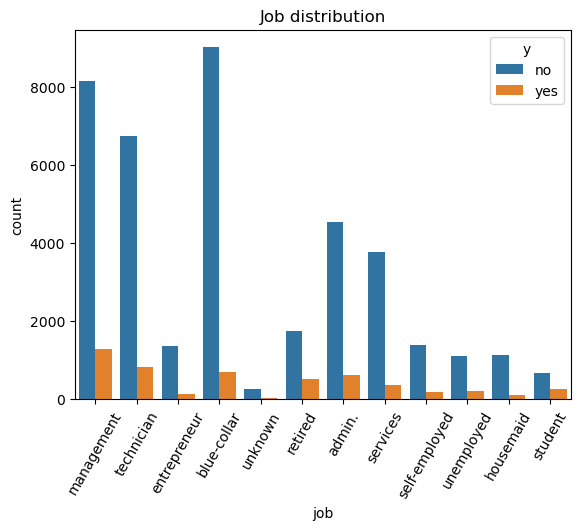

<Figure size 3000x600 with 0 Axes>

In [10]:
sns.countplot(x='job', data=data, hue='y').set_title('Job distribution')
plt.xticks(rotation=60)
plt.figure(figsize=(30, 6))
plt.show()

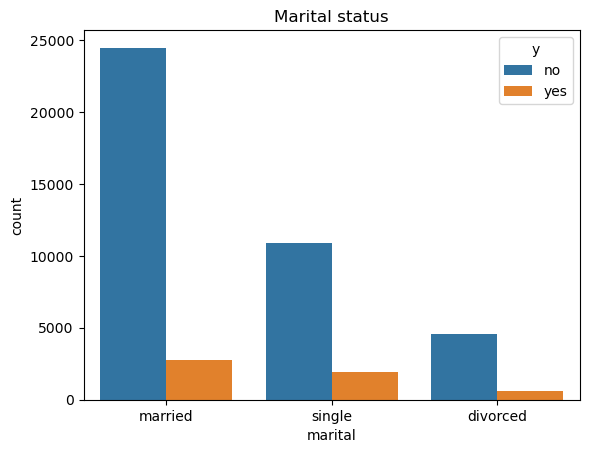

<Figure size 3000x600 with 0 Axes>

In [11]:
sns.countplot(x='marital', data=data, hue='y').set_title('Marital status')
plt.figure(figsize=(30, 6))
plt.show()

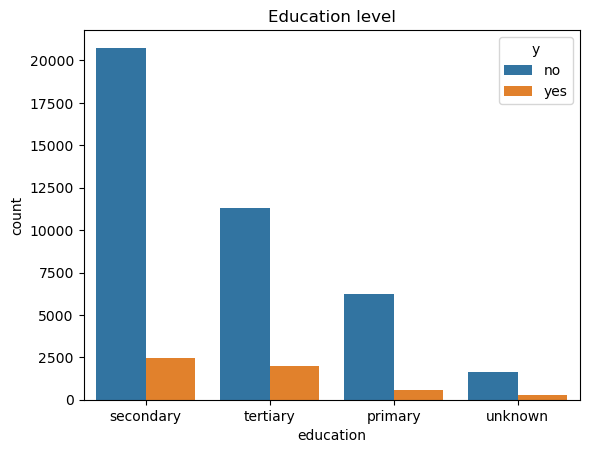

<Figure size 3000x600 with 0 Axes>

In [12]:
sns.countplot(x='education', data=data, hue='y', order=data['education'].value_counts().index).set_title('Education level')
plt.figure(figsize=(30, 6))
plt.show()

In [13]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder

colums = data.select_dtypes(include='object').columns
encoder = LabelEncoder()
data[colums] = data[colums].apply(encoder.fit_transform)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


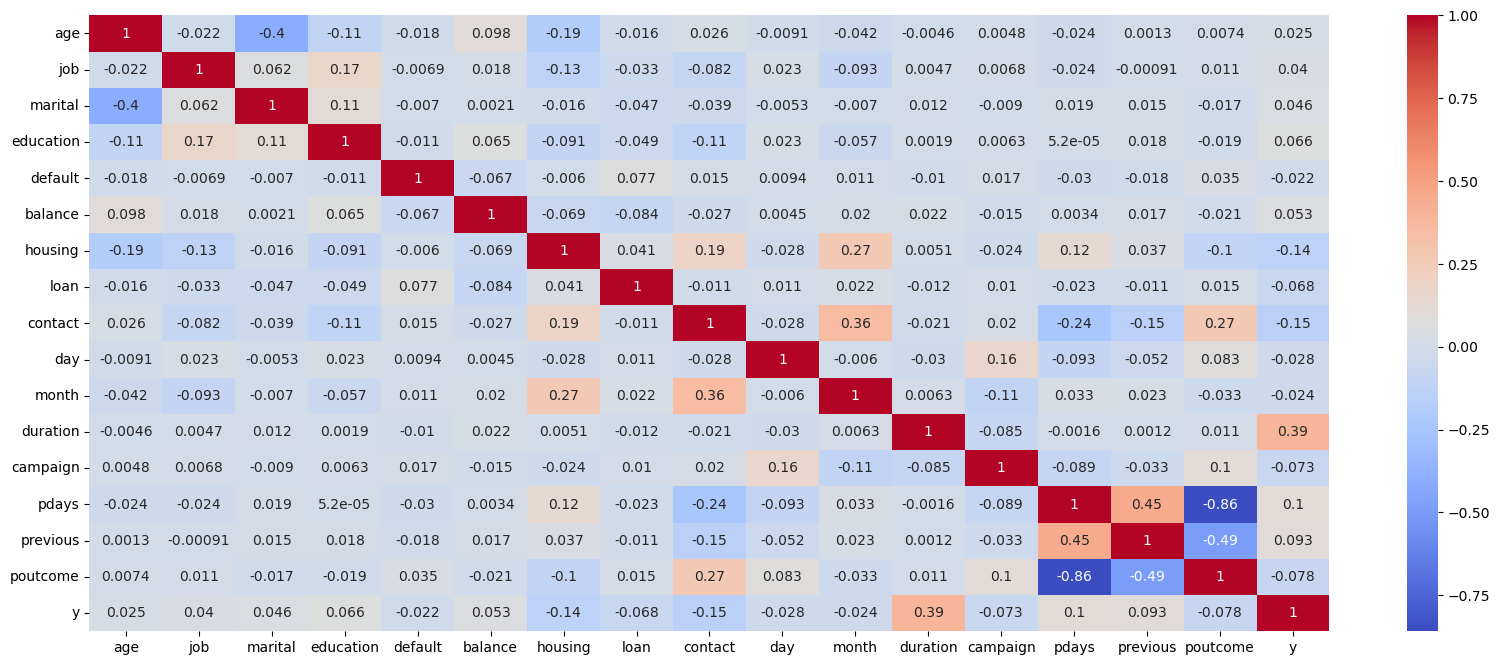

In [14]:
# correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
# normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = data.drop('y', axis=1)
y = data['y']
X = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X, columns=data.drop('y', axis=1).columns)
X_scaled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898


In [16]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [17]:
# train model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)

In [18]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [19]:
print('Train score:', classifier.score(X_train, y_train))
print('Test score:', classifier.score(X_test, y_test))

Train score: 0.9099440705280122
Test score: 0.8986287230905338


In [20]:
predictions = classifier.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
classifier.predict_proba(X_test)

array([[0.96270841, 0.03729159],
       [0.99140061, 0.00859939],
       [0.97196262, 0.02803738],
       ...,
       [0.96270841, 0.03729159],
       [0.99140061, 0.00859939],
       [0.9612069 , 0.0387931 ]])

In [22]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8986287230905338

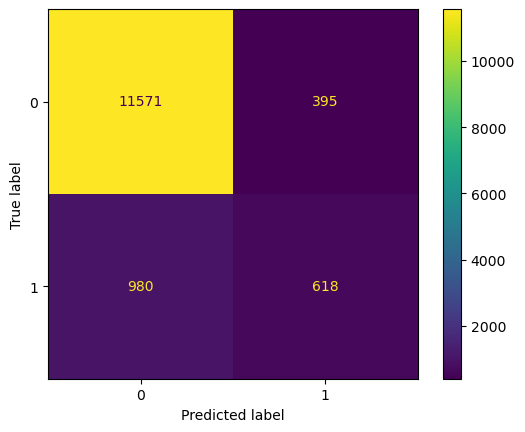

In [23]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm, display_labels=classifier.classes_).plot()
plt.show()

In [24]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94     11966
         yes       0.61      0.39      0.47      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [25]:
# feature importance
feature_importance = pd.DataFrame(classifier.feature_importances_, index=X_scaled.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importance

,importance
duration,0.510620
poutcome,0.131263
month,0.107361
pdays,0.076403
age,0.061961
housing,0.039726
contact,0.033416
balance,0.016736
day,0.014866
loan,0.003304


In [26]:
features = list(feature_importance[feature_importance['importance'] > 0.01].index)
features

['duration',
 'poutcome',
 'month',
 'pdays',
 'age',
 'housing',
 'contact',
 'balance',
 'day']

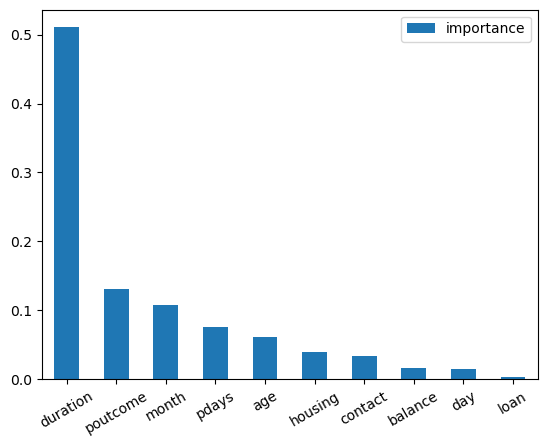

In [27]:
feature_importance.head(10).plot(kind='bar')
plt.xticks(rotation=30)
plt.show()

In [28]:
# visualize the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(200, 50))
plot_tree(
    classifier,
    feature_names=X_scaled.columns,
    class_names={0: 'No', 1: 'Yes'},
    filled=True)

[Text(0.5075867052023122, 0.9375, 'duration <= 0.98\ngini = 0.206\nsamples = 31647\nvalue = [27956, 3691]\nclass = No'),
 Text(0.2514450867052023, 0.8125, 'month <= 1.323\ngini = 0.141\nsamples = 28080\nvalue = [25942, 2138]\nclass = No'),
 Text(0.16040462427745664, 0.6875, 'age <= 1.842\ngini = 0.123\nsamples = 27268\nvalue = [25479, 1789]\nclass = No'),
 Text(0.09248554913294797, 0.5625, 'pdays <= -0.317\ngini = 0.111\nsamples = 26730\nvalue = [25159, 1571]\nclass = No'),
 Text(0.046242774566473986, 0.4375, 'duration <= 0.215\ngini = 0.075\nsamples = 22246\nvalue = [21382, 864]\nclass = No'),
 Text(0.023121387283236993, 0.3125, 'month <= -1.671\ngini = 0.051\nsamples = 18771\nvalue = [18280, 491]\nclass = No'),
 Text(0.011560693641618497, 0.1875, 'housing <= -0.112\ngini = 0.24\nsamples = 797\nvalue = [686.0, 111.0]\nclass = No'),
 Text(0.005780346820809248, 0.0625, 'gini = 0.464\nsamples = 262\nvalue = [166.0, 96.0]\nclass = No'),
 Text(0.017341040462427744, 0.0625, 'gini = 0.055\ns